In [1]:
using SampledSignals
using LibSndFile
using FileIO
using DSP
using Images
using Plots
using PortAudio

ALSA lib pcm_dsnoop.c:618:(snd_pcm_dsnoop_open) unable to open slave
ALSA lib pcm_dmix.c:1052:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_dmix.c:1052:(snd_pcm_dmix_open) unable to open slave
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock


In [ ]:
speech = load("signals/speech@24kHz.wav")

In [3]:
fs = 44100;
fmin = 100;
fmax = 20000;
len_seconds = 3;

## Generate Chirp Signal

$$
x(t)=\sin \left[\phi_{0}+2 \pi f_{0}\left(\frac{k^{(t)}-1}{\ln (k)}\right)\right]
$$

$$
k=\left(\frac{f_{1}}{f_{0}}\right)^{\frac{1}{T}}
$$

In [4]:
function gen_chirp(fmin, fmax, len_seconds, fs)
    x = collect(0:1/fs:len_seconds)
    k = (fmax / fmin)^(1/len_seconds)
    chirp =  [sin(2*π*fmin * ((k^(x[i]) - 1) / log(k))) for i in 1:length(x)]
    return chirp
end

gen_chirp (generic function with 1 method)

In [5]:
function spec(sig, window)
    colorview(Gray, power(spectrogram(sig, window)))
end

spec (generic function with 1 method)

In [6]:
chirp = gen_chirp(fmin, fmax, len_seconds, fs);

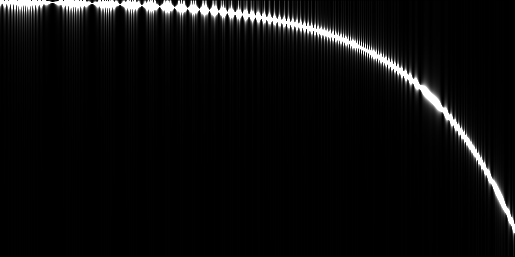

In [7]:
using Plots
spec(chirp, 2^9)

Internal error: encountered unexpected error in runtime:
InterruptException()
jl_mutex_unlock at /buildworker/worker/package_linux64/build/src/locks.h:138 [inlined]
jl_typeinf_end at /buildworker/worker/package_linux64/build/src/gf.c:2623
typeinf_ext at ./compiler/typeinfer.jl:577
typeinf_ext at ./compiler/typeinfer.jl:613
jfptr_typeinf_ext_1.clone_1 at /home/zach/packages/julias/julia-1.1.1/lib/julia/sys.so (unknown line)
jl_apply_generic at /buildworker/worker/package_linux64/build/src/gf.c:2197
jl_apply at /buildworker/worker/package_linux64/build/src/julia.h:1571 [inlined]
jl_type_infer at /buildworker/worker/package_linux64/build/src/gf.c:255
jl_compile_method_internal at /buildworker/worker/package_linux64/build/src/gf.c:1797 [inlined]
jl_fptr_trampoline at /buildworker/worker/package_linux64/build/src/gf.c:1841
jl_apply_generic at /buildworker/worker/package_linux64/build/src/gf.c:2197
do_call at /buildworker/worker/package_linux64/build/src/interpreter.c:323
eval_value at /buil

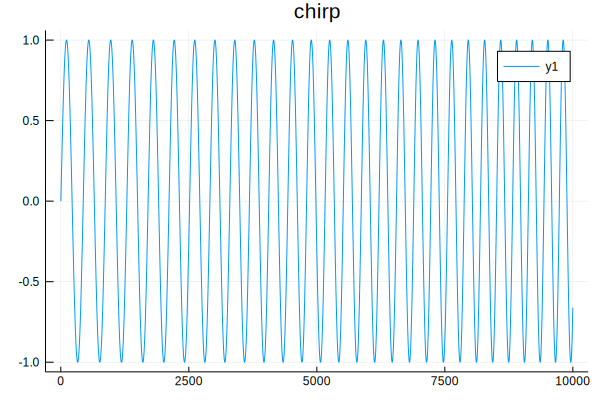

In [8]:
plot(chirp[1:10000], title="chirp")

In [9]:
play(chirp)

UndefVarError: UndefVarError: play not defined

In [ ]:
stream = PortAudioStream()

In [ ]:
write(stream, chirp)